In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import ast

In [143]:
df = pd.read_csv('data/cleaning_data.csv')
df.drop(['No', 'Release_Data'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3318 non-null   object 
 1   Theater_counts     3318 non-null   int64  
 2   Opening_Weekend    3318 non-null   int64  
 3   Budget             3318 non-null   int64  
 4   Cast               3318 non-null   object 
 5   Crew               3318 non-null   object 
 6   Studios            3318 non-null   object 
 7   Genre              3318 non-null   object 
 8   Languages          3318 non-null   object 
 9   Countries          3318 non-null   object 
 10  Runtime            3318 non-null   int64  
 11  Gross_worldwide    3318 non-null   int64  
 12  Rating             3318 non-null   float64
 13  ListOfCertificate  3318 non-null   object 
 14  Release_Year       3318 non-null   int64  
 15  Release_Month      3318 non-null   int64  
 16  Release_Day        3318 

In [144]:
df['Cast'] = df['Cast'].apply(ast.literal_eval)
df['Cast'] = df['Cast'].apply(lambda x: x[:3])
df['Crew'] = df['Crew'].apply(ast.literal_eval)
df['Crew'] = df['Crew'].apply(lambda x: x[:3])
df['Studios'] = df['Studios'].apply(ast.literal_eval)
df['Studios'] = df['Studios'].apply(lambda x: x[:3])
df['Genre'] = df['Genre'].apply(ast.literal_eval)
df['Genre'] = df['Genre'].apply(lambda x: x[:3])
df['Languages'] = df['Languages'].apply(ast.literal_eval)
df['Languages'] = df['Languages'].apply(lambda x: x[:3])
df['Countries'] = df['Countries'].apply(ast.literal_eval)
df['Countries'] = df['Countries'].apply(lambda x: x[:3])
df['ListOfCertificate'] = df['ListOfCertificate'].apply(ast.literal_eval)
df['ListOfCertificate'] = df['ListOfCertificate'].apply(lambda x: x[:3])

In [145]:
df_cast = df.explode('Cast')
print(len(df_cast.Cast.unique()))
df_cre = df.explode('Crew')
print(len(df_cre.Crew.unique()))
df_stu = df.explode('Studios')
print(len(df_stu.Studios.unique()))
df_con = df.explode('Countries')
print(len(df_con.Countries.unique()))
df_lan = df.explode('Languages')
print(len(df_lan.Languages.unique()))
df_gen = df.explode('Genre')
print(len(df_gen.Genre.unique()))

3360
4163
2403
64
120
23


In [137]:
df_actor_movie_count = df_cast.groupby('Cast').size().sort_values(ascending=False)
df_actor_movie_count.rename('Number_of_movies', inplace=True)
df_actor_movie_revenue = df_cast.groupby('Cast')['Gross_worldwide'].sum().sort_values(ascending=False)
df_actor_movie_revenue = df_actor_movie_revenue.reset_index()
df_actor_movie_count = df_actor_movie_count.reset_index()
df_actor_movie_count.head()
df_actor_movie = pd.merge(df_actor_movie_count, df_actor_movie_revenue, on='Cast')
df_actor_movie = df_actor_movie[df_actor_movie['Number_of_movies'] > 4]
df_actor_movie = df_actor_movie[df_actor_movie['Gross_worldwide'] > 1750000000]
df_actor_movie.reset_index(drop=True, inplace=True) 
df_actor_movie.shape

(202, 3)

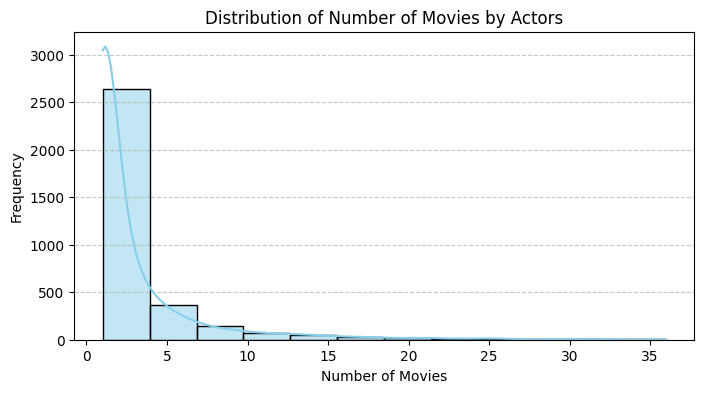

In [94]:
plt.figure(figsize=(8, 4))
sns.histplot(df_actor_movie_count['Number_of_movies'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of Number of Movies by Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

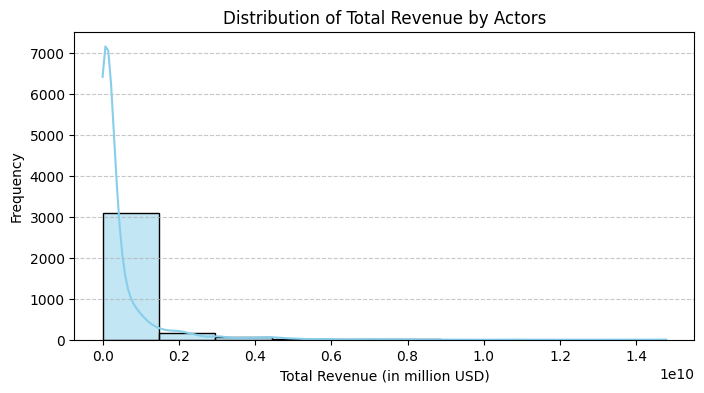

In [107]:
plt.figure(figsize=(8, 4))
sns.histplot(df_actor_movie_revenue['Gross_worldwide'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total Revenue by Actors')
plt.xlabel('Total Revenue (in million USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [140]:
df_crew_movie_count = df_cre.groupby('Crew').size().sort_values(ascending=False)
df_crew_movie_count.rename('Number_of_movies', inplace=True)
df_crew_movie_revenue = df_cre.groupby('Crew')['Gross_worldwide'].sum().sort_values(ascending=False)
df_crew_movie_revenue = df_crew_movie_revenue.reset_index()
df_crew_movie_count = df_crew_movie_count.reset_index()
df_crew_movie = pd.merge(df_crew_movie_count, df_crew_movie_revenue, on='Crew')
df_crew_movie = df_crew_movie[df_crew_movie['Number_of_movies'] > 6]
df_crew_movie = df_crew_movie[df_crew_movie['Gross_worldwide'] > 1000000000]
df_crew_movie.reset_index(drop=True, inplace=True) 
df_crew_movie.shape

(128, 3)

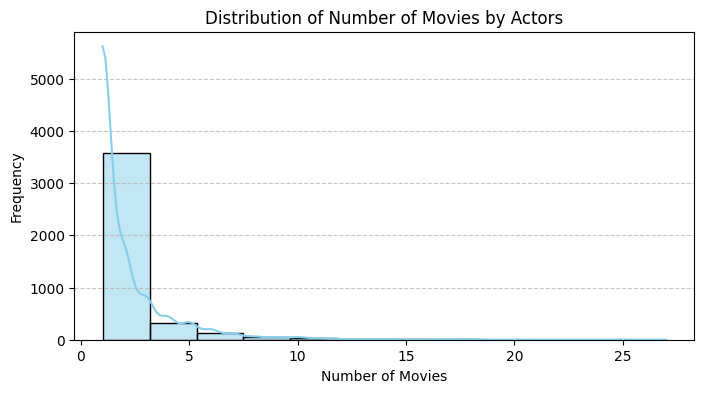

In [109]:
plt.figure(figsize=(8, 4))
sns.histplot(df_crew_movie_count['Number_of_movies'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of Number of Movies by Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

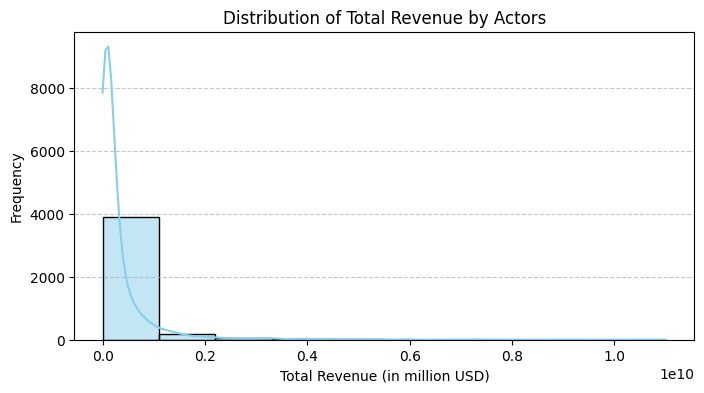

In [111]:
plt.figure(figsize=(8, 4))
sns.histplot(df_crew_movie_revenue['Gross_worldwide'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total Revenue by Actors')
plt.xlabel('Total Revenue (in million USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [141]:
df_studios_movie_count = df_stu.groupby('Studios').size().sort_values(ascending=False)
df_studios_movie_count.rename('Number_of_movies', inplace=True)
df_studios_movie_revenue = df_stu.groupby('Studios')['Gross_worldwide'].sum().sort_values(ascending=False)
df_studios_movie_revenue = df_studios_movie_revenue.reset_index()
df_studios_movie_count = df_studios_movie_count.reset_index()
df_studios_movie = pd.merge(df_studios_movie_count, df_studios_movie_revenue, on='Studios')
df_studios_movie = df_studios_movie[df_studios_movie['Number_of_movies'] > 25]
df_studios_movie = df_studios_movie[df_studios_movie['Gross_worldwide'] > 6000000000]
df_studios_movie.reset_index(drop=True, inplace=True)
df_studios_movie.shape

(22, 3)

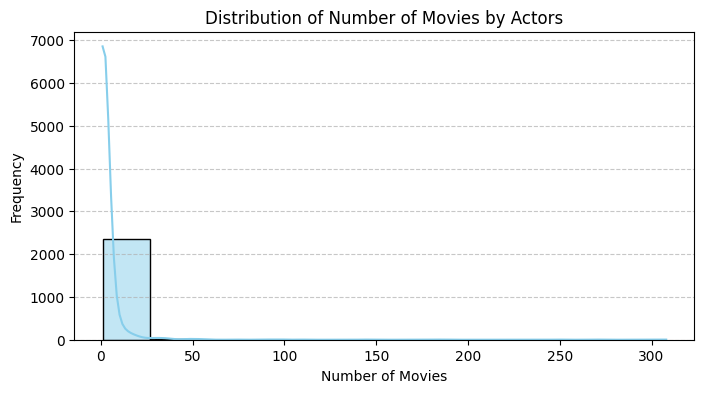

In [119]:
plt.figure(figsize=(8, 4))
sns.histplot(df_studios_movie_count['Number_of_movies'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of Number of Movies by Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

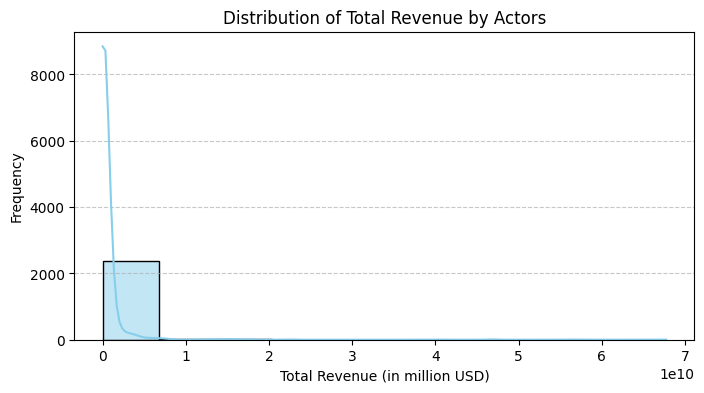

In [121]:
plt.figure(figsize=(8, 4))
sns.histplot(df_studios_movie_revenue['Gross_worldwide'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Total Revenue by Actors')
plt.xlabel('Total Revenue (in million USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [149]:
actor_selected = df_actor_movie['Cast'].values
crew_selected = df_crew_movie['Crew'].index.values
studios_selected = df_studios_movie['Studios'].index.values

In [153]:
df_actor_movie_selected = df_cast[df_cast['Cast'].isin(actor_selected)]
df_actor_movie_selected

,Title,Theater_counts,Opening_Weekend,Budget,Cast,Crew,Studios,Genre,Languages,Countries,Runtime,Gross_worldwide,Rating,ListOfCertificate,Release_Year,Release_Month,Release_Day
0,Avatar,3452,77025481,237000000,Sam Worthington,[James Cameron],"[Twentieth Century Fox, Dune Entertainment, Li...","[Action, Adventure, Fantasy]","[English, Spanish]",[United States],162,2847246203,7.8,[PG-13],2009,12,18
0,Avatar,3452,77025481,237000000,Zoe Saldana,[James Cameron],"[Twentieth Century Fox, Dune Entertainment, Li...","[Action, Adventure, Fantasy]","[English, Spanish]",[United States],162,2847246203,7.8,[PG-13],2009,12,18
0,Avatar,3452,77025481,237000000,Sigourney Weaver,[James Cameron],"[Twentieth Century Fox, Dune Entertainment, Li...","[Action, Adventure, Fantasy]","[English, Spanish]",[United States],162,2847246203,7.8,[PG-13],2009,12,18
1,Avengers: Endgame,4662,357115007,356000000,Robert Downey Jr.,"[Stan Lee, Joe Russo, Christopher Markus]","[Marvel Studios, Walt Disney Pictures]","[Action, Adventure, Drama]","[English, Japanese, Xhosa]",[United States],181,2797501328,8.4,[PG-13],2019,4,26
1,Avengers: Endgame,4662,357115007,356000000,Chris Evans,"[Stan Lee, Joe Russo, Christopher Markus]","[Marvel Studios, Walt Disney Pictures]","[Action, Adventure, Drama]","[English, Japanese, Xhosa]",[United States],181,2797501328,8.4,[PG-13],2019,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,Kevin Hart: What Now?,2567,11767210,9900000,Halle Berry,"[Tim Story, Joey Wells, Harry Ratchford]","[Hartbeat Productions, Universal Pictures]","[Documentary, Comedy]",[English],[United States],96,23591043,6.0,[R],2016,10,14
3311,Oscar,2381,5091027,35000000,Sylvester Stallone,"[Claude Magnier, Michael Barrie, Jim Mulholland]","[Joseph S. Vecchio Entertainment, Silver Scree...","[Comedy, Crime]","[English, Italian]",[United States],109,23562716,6.5,[PG],1991,4,26
3314,Legend,1187,4261154,24500000,Tom Cruise,"[Ridley Scott, William Hjortsberg]","[Legend Production Company, Embassy Internatio...","[Adventure, Fantasy, Romance]","[English, Italian]","[United States, United Kingdom]",94,15502112,6.4,[PG],1985,12,13
3315,Legend,1187,4261154,30000000,Tom Hardy,"[Brian Helgeland, John Pearson]","[Cross Creek Pictures, Working Title Films, An...","[Biography, Crime, Drama]",[English],"[United Kingdom, France, United States]",132,42972994,6.9,[R],2015,10,9
